# Tutorial 10: Sequential Synthesis
In this tutorial, we explore the **Sequential Synthesis** approach using
the `syn_seq` plugin in `synthcity`. Sequential synthesis allows us to
model variables one-by-one (column-by-column), using conditional relationships
learned from the real data. The main idea is:
1. Synthesize the first variable (often with sample-without-replacement, "SWR"),
2. Then synthesize the second variable conditioned on the first,
3. And so on for each subsequent variable.
This approach can better preserve complex dependencies among columns than
simple marginal or naive methods.
We'll demonstrate this using the **diabetes** dataset, just like other tutorials,
and compare the resulting synthetic data.

In [1]:
!pip install synthcity

In [2]:
# stdlib
import warnings

warnings.filterwarnings("ignore")

# third party
from sklearn.datasets import load_diabetes

# synthcity absolute
from synthcity.plugins import Plugins

from synthcity.plugins.core.dataloader import Syn_SeqDataLoader

eval_plugin = "syn_seq"

[KeOps] Warning : omp.h header is not in the path, disabling OpenMP. To fix this, you can set the environment
                  variable OMP_PATH to the location of the header before importing keopscore or pykeops,
                  e.g. using os.environ: import os; os.environ['OMP_PATH'] = '/path/to/omp/header'
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


### Load dataset


In [3]:
# synthcity absolute
from synthcity.plugins.core.dataloader import GenericDataLoader

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

loader = Syn_SeqDataLoader(X, target_column="target", sensitive_columns=["sex"])

loader.dataframe()


[INFO] Syn_SeqEncoder summary:
  (column, method)

  (age, swr)
    --> 
  (sex, cart)
    --> 
  (bmi, cart)
    --> 
  (bp, cart)
    --> 
  (s1, cart)
    --> 
  (s2, cart)
    --> 
  (s3, cart)
    --> 
  (s4, cart)
    --> 
  (s5, cart)
    --> 
  (s6, cart)
    --> 
  (target, cart)

  - variable_selection_:
        age  sex  bmi  bp  s1  s2  s3  s4  s5  s6  target
age       0    0    0   0   0   0   0   0   0   0       0
sex       1    0    0   0   0   0   0   0   0   0       0
bmi       1    1    0   0   0   0   0   0   0   0       0
bp        1    1    1   0   0   0   0   0   0   0       0
s1        1    1    1   1   0   0   0   0   0   0       0
s2        1    1    1   1   1   0   0   0   0   0       0
s3        1    1    1   1   1   1   0   0   0   0       0
s4        1    1    1   1   1   1   1   0   0   0       0
s5        1    1    1   1   1   1   1   1   0   0       0
s6        1    1    1   1   1   1   1   1   1   0       0
target    1    1    1   1   1   1   1   1   1

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Train the generator


In [4]:
# synthcity absolute
from synthcity.plugins import Plugins

syn_model = Plugins().get(eval_plugin)

syn_model.fit(loader)

[2025-02-28T02:58:12.873394+0900][2388][CRITICAL] module disabled: /Users/minkeychang/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


{'data_type': 'syn_seq', 'len': 442, 'train_size': 0.8, 'random_state': 0, 'syn_order': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target'], 'method': {'age': 'swr', 'sex': 'cart', 'bmi': 'cart', 'bp': 'cart', 's1': 'cart', 's2': 'cart', 's3': 'cart', 's4': 'cart', 's5': 'cart', 's6': 'cart', 'target': 'cart'}, 'variable_selection': {'age': [], 'sex': ['age'], 'bmi': ['age', 'sex'], 'bp': ['age', 'sex', 'bmi'], 's1': ['age', 'sex', 'bmi', 'bp'], 's2': ['age', 'sex', 'bmi', 'bp', 's1'], 's3': ['age', 'sex', 'bmi', 'bp', 's1', 's2'], 's4': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3'], 's5': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4'], 's6': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'], 'target': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']}}
[INFO] Syn_Seq aggregator: fitting columns...
Fitting 'age' => stored values from real data. Done.
Fitting 'sex' with 'cart' ... Done!
Fitting 'bmi' with 'cart' ... Done!
Fitting 'bp' wit

### Generate new samples


In [5]:
syn_model.generate(count=1000).dataframe()

Generating 'age' => done.
Generating 'sex' => done.
Generating 'bmi' => done.
Generating 'bp' => done.
Generating 's1' => done.
Generating 's2' => done.
Generating 's3' => done.
Generating 's4' => done.
Generating 's5' => done.
Generating 's6' => done.
Generating 'target' => done.


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.041708,-0.044642,-0.007284,0.028758,-0.042848,-0.048286,0.052322,-0.076395,-0.072133,0.023775,182.0
1,-0.078165,0.050680,0.077863,0.052858,0.078236,0.064447,0.026550,-0.002592,0.040673,-0.009362,233.0
2,0.059871,-0.044642,-0.000817,-0.084856,0.075484,0.079478,0.004460,0.034309,0.023371,0.027917,115.0
3,0.056239,0.050680,-0.030996,0.008101,0.019070,0.021233,0.033914,-0.039493,-0.029526,-0.059067,91.0
4,0.070769,-0.044642,0.012117,0.042529,0.071357,0.053487,0.052322,-0.002592,0.025395,-0.005220,143.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.070769,0.050680,-0.016984,0.021872,0.043837,0.056305,0.037595,-0.002592,-0.070209,-0.017646,80.0
996,-0.052738,-0.044642,-0.055785,-0.036656,0.089244,-0.003193,0.008142,0.034309,0.132376,0.003064,109.0
997,0.038076,0.050680,-0.018062,0.066629,-0.051103,-0.016658,-0.076536,0.034309,-0.011897,-0.013504,77.0
998,0.027178,0.050680,-0.006206,0.028758,-0.016704,-0.001627,-0.058127,0.034309,0.029297,0.032059,164.0


Generating 'age' => done.
Generating 'sex' => done.
Generating 'bmi' => done.
Generating 'bp' => done.
Generating 's1' => done.
Generating 's2' => done.
Generating 's3' => done.
Generating 's4' => done.
Generating 's5' => done.
Generating 's6' => done.
Generating 'target' => done.


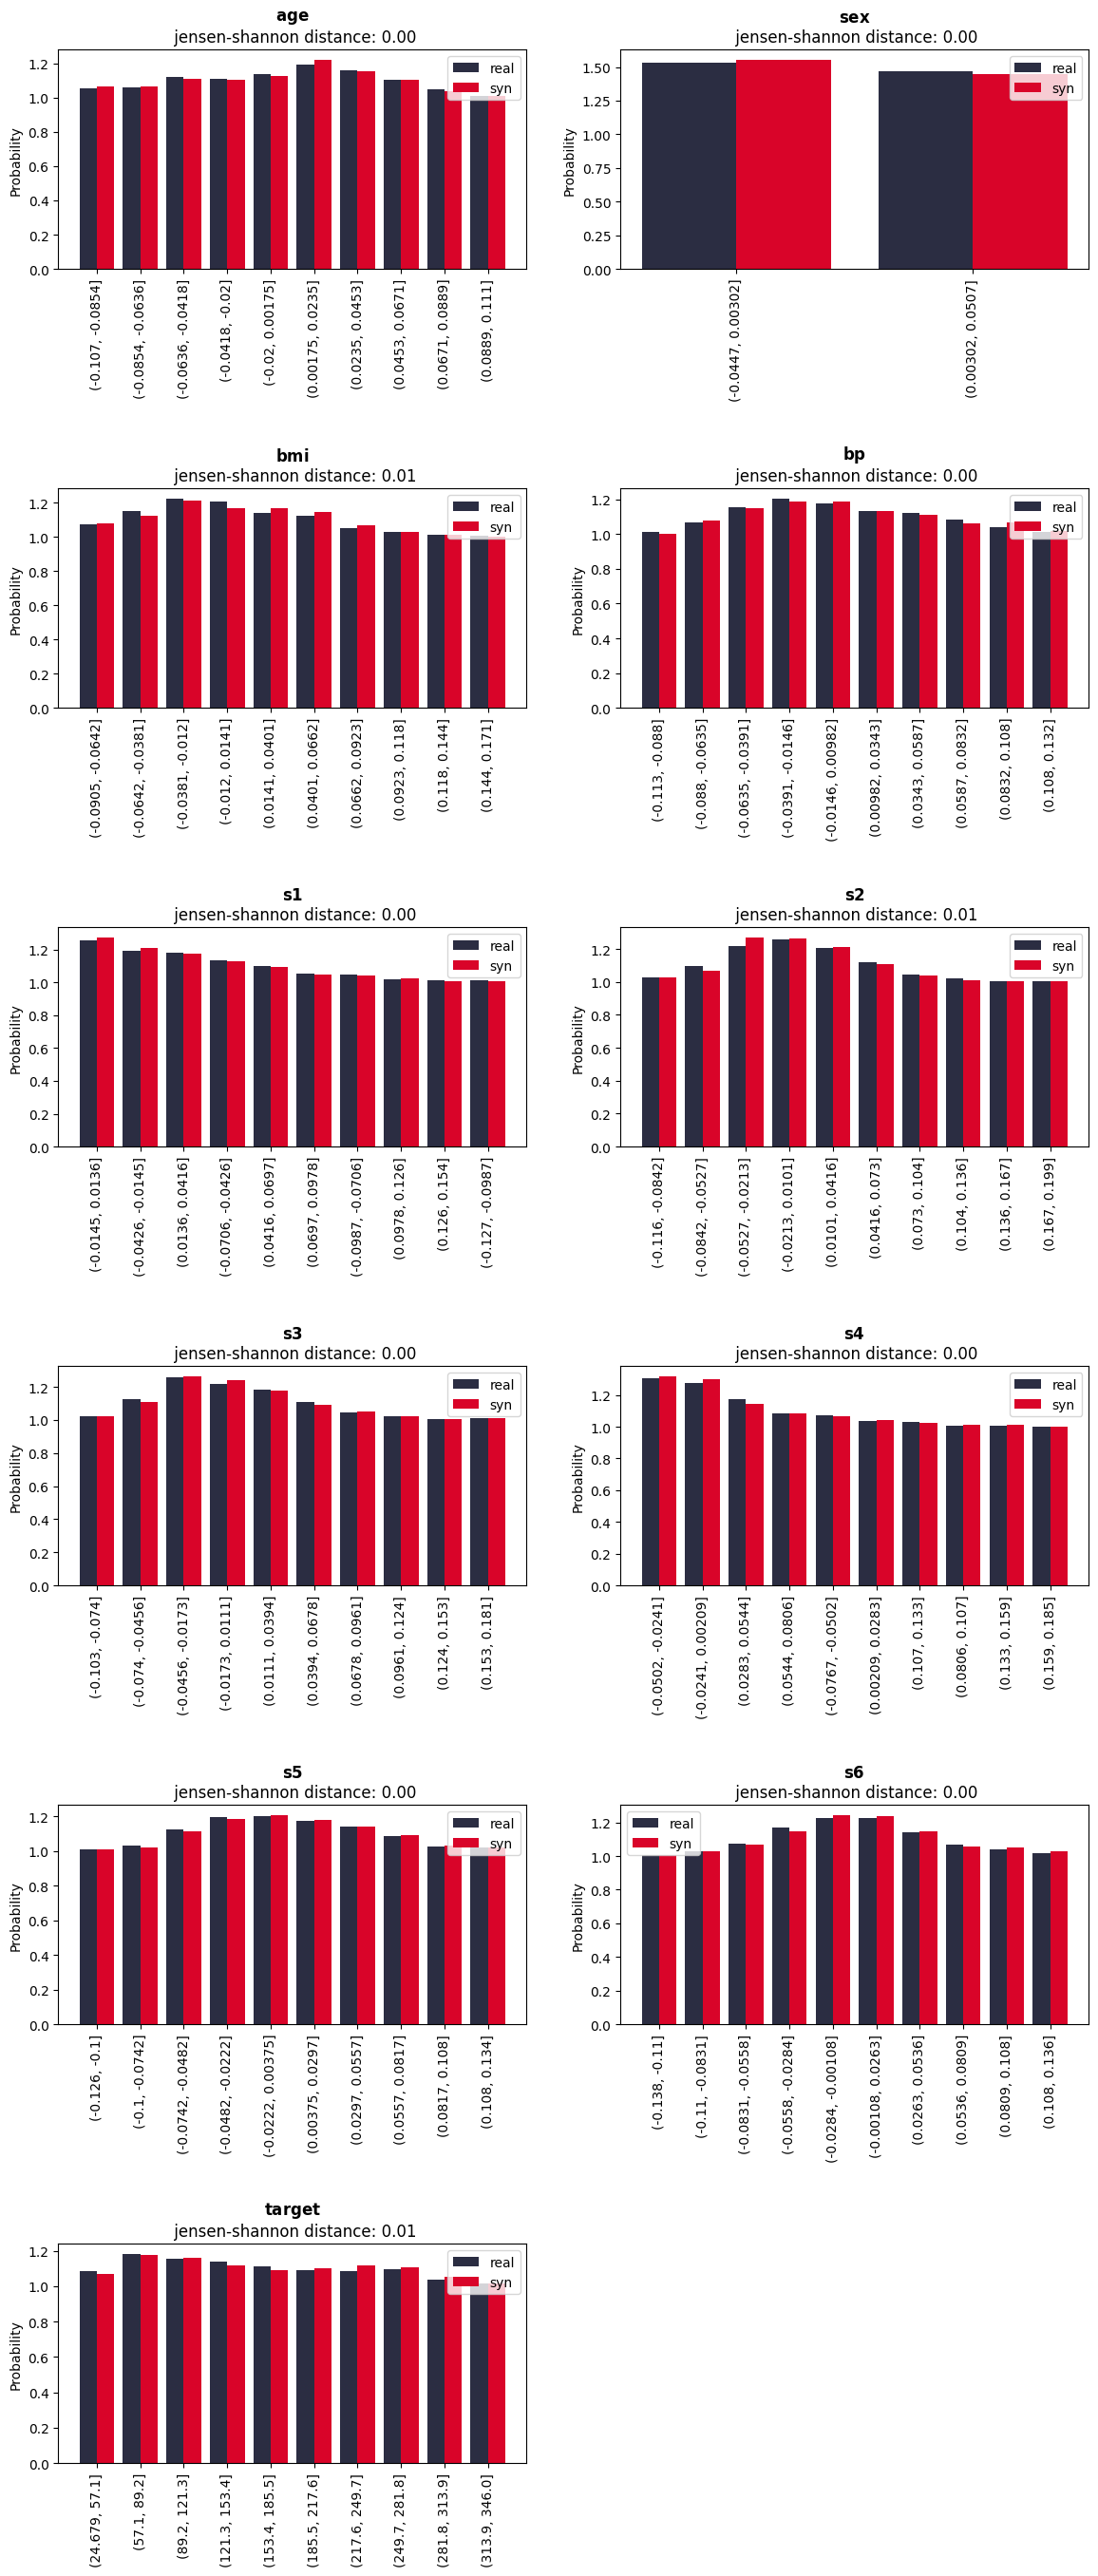

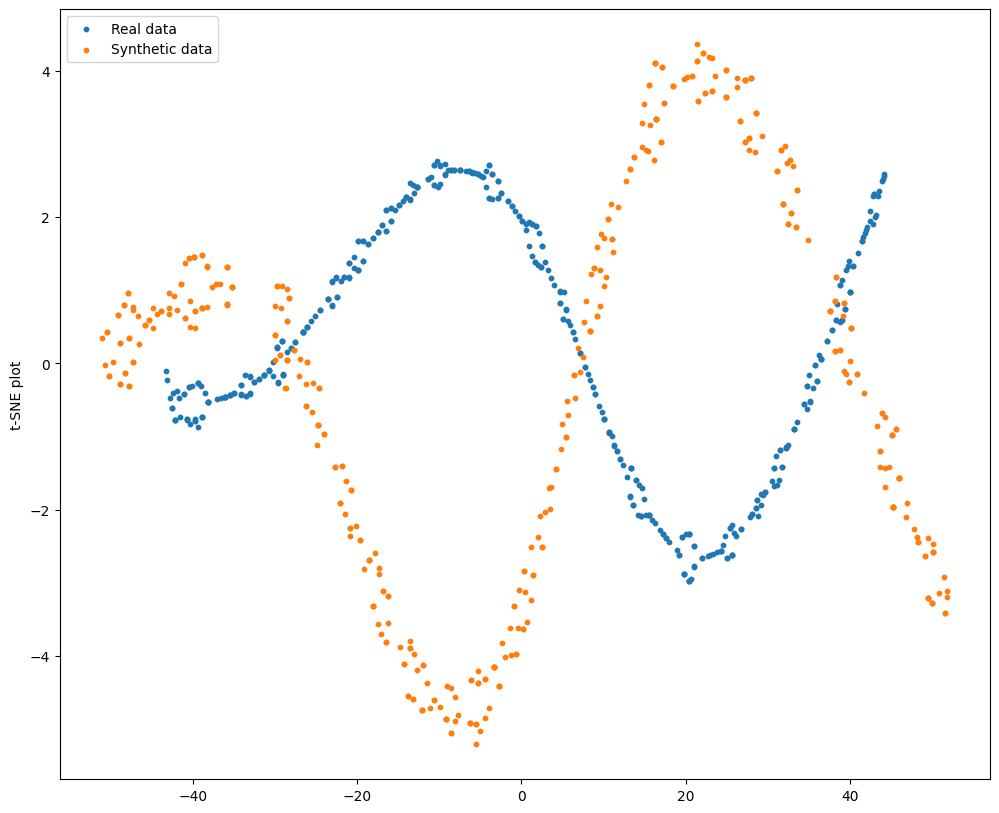

In [6]:
# third party
import matplotlib.pyplot as plt

syn_model.plot(plt, loader)

plt.show()

### Benchmarks

In [7]:
# synthcity absolute
from synthcity.benchmark import Benchmarks

score = Benchmarks.evaluate(
    [
        (eval_plugin, eval_plugin, {"n_iter": 50})
    ],  # (testname, plugin, plugin_args) REPLACE {"n_iter" : 50} with {} for better performance
    loader,
    repeats=2,
    metrics={"detection": ["detection_mlp"]},  # DELETE THIS LINE FOR ALL METRICS
)

In [8]:
Benchmarks.print(score)


Plugin : syn_seq


,min,max,mean,stddev,median,iqr,rounds,errors,durations
detection.detection_mlp.mean,0.542593,0.56358,0.553086,0.010494,0.553086,0.010494,2,0,0.0


# User Modification

from the below, we are using 'Adult' dataset which contains many highly skewed categorical variables.
As you can see from the tutorial5_differential_privacy, such dataset resembles closely with real world dataset and it is very hard to synthesize.

## Load Dataset

If we run the dataloader, it automatically shows order of synthesis and variable selection matrix. Variable selection matrix indicates which variables are used to synthesize the variable in each synthesis.

In [9]:
# Load the reference data
# Note: preprocessing data with OneHotEncoder or StandardScaler is not needed or recommended. Synthcity handles feature encoding and standardization internally.
from synthcity.utils.datasets.categorical.categorical_adult import CategoricalAdultDataloader

X = CategoricalAdultDataloader().load()

X.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income>50K
0,23,5,4,12,2,8,3,0,1,2,0,39,0,0
1,34,1,4,12,0,4,2,0,1,0,0,12,0,0
2,22,0,13,8,1,6,3,0,1,0,0,39,0,0
3,37,0,15,6,0,6,2,4,1,0,0,39,0,0
4,12,0,22,12,0,5,0,4,0,0,0,39,12,0


## Preprocess the data for special values and imbalanced dataset

We provide feature that preprocess the dataset to create better quality in sequential synthesis.
Preprocessing includes data type assignment, encoded value flag, and imbalanced variable handling.

In [10]:
# synthcity absolute
from synthcity.plugins.core.models.syn_seq.syn_seq_preprocess import SynSeqPreprocessor

# 1) 전처리 인스턴스 생성 + 사전 작업
prep = SynSeqPreprocessor(
    user_dtypes={
        "workclass": "category",
        "occupation": "category",
        "relationship": "category",
        "native-country": "category",
        "race": "category",
        "martial-status": "category",
        "sex": "category",
        "income>50K": "category",
    },
    user_special_values={
        "capital-gain": [0],
        "capital-loss": [0]
    },
    max_categories=15
)

# 2) Preprocess (date -> offset, numeric split 등)
X_processed = prep.preprocess(X, oversample=True)

[auto_assign] age -> numeric (nuniq=74)
[auto_assign] fnlwgt -> numeric (nuniq=77)
[auto_assign] education-num -> numeric (nuniq=16)
[auto_assign] marital-status -> category (nuniq=7)
[auto_assign] capital-gain -> numeric (nuniq=23)
[auto_assign] capital-loss -> numeric (nuniq=48)
[auto_assign] hours-per-week -> numeric (nuniq=96)
[detect_special] Categorical column 'race' is highly imbalanced: 0 occurs in 85.5% of non-null rows.
[detect_special] Numeric column 'capital-gain' is highly imbalanced: 0 occurs in 91.9% of non-null rows.
[detect_special] Numeric column 'capital-loss' is highly imbalanced: 0 occurs in 95.3% of non-null rows.
[detect_special] Categorical column 'native-country' is highly imbalanced: 0 occurs in 89.7% of non-null rows.
[oversample] Column 'race': dominant count = 41762, minority count = 7080, ratio = 5.90
[oversample] Column 'race': added 1416 oversampled minority rows (target minority = 8496).
[oversample] Column 'capital-gain': dominant count = 46222, minori

## Define the dataloader with user custom

After preprocessing the dataset, user can define what order to synthesize and what methods to apply for each sequence.
Variables with many categories like 'native-country' are recommended to come first.

In [11]:
user_custom = {
# Decide which order to synthesize the dataset.
    'syn_order' : ['native-country', 'sex', 'workclass', 'education-num', 'marital-status', 'age',
       'occupation', 'relationship', 'fnlwgt', 'race', 'capital-loss', 'hours-per-week', 'income>50K', 'capital-gain'],

# Specify the method to use for certain variables. 'CART' is used as default.
    'method' : {"relationship": "rf",
                "race": "pmm"
                },

# Select which variables to use as predictor of synthesizing for each sequence.
    'variable_selection' : {
      'capital-loss': ['age', 'sex', 'workclass', 'education-num', 'marital-status',
         'occupation', 'relationship', 'fnlwgt', 'race'],
      'hours-per-week': ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
         'occupation', 'relationship', 'race', 'sex'],
      'native-country': ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country'],
      'income>50K': ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'hours-per-week', 'native-country'],
      'capital-gain': ['age', 'sex', 'workclass', 'education-num', 'marital-status',
       'occupation', 'relationship', 'fnlwgt', 'race', 'capital-loss', 'hours-per-week', 'native-country', 'income>50K']
         }
}

In [12]:
loader = Syn_SeqDataLoader(X_processed,
                           user_custom=user_custom,
                           target_column="income>50K", sensitive_columns=["sex", "race"])

loader.dataframe().head()


[INFO] Syn_SeqEncoder summary:
  (column, method)

  (native-country, swr)
    --> 
  (sex, cart)
    --> 
  (workclass, cart)
    --> 
  (education-num, cart)
    --> 
  (marital-status, cart)
    --> 
  (age, cart)
    --> 
  (occupation, cart)
    --> 
  (relationship, rf)
    --> 
  (fnlwgt, cart)
    --> 
  (race, pmm)
    --> 
  (capital-loss_cat, cart)
    --> 
  (capital-loss, cart)
    --> 
  (hours-per-week, cart)
    --> 
  (income>50K, cart)
    --> 
  (capital-gain_cat, cart)
    --> 
  (capital-gain, cart)

  - variable_selection_:
                  native-country  sex  workclass  education-num  \
native-country                 1    1          1              1   
sex                            1    0          0              0   
workclass                      1    1          0              0   
education-num                  1    1          1              0   
marital-status                 1    1          1              1   
age                            1    1        

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain_cat,capital-gain,capital-loss_cat,capital-loss,hours-per-week,native-country,income>50K
0,23,5,4,12,2,8,3,0,1,-777777777,2,0,0,39,0,0
1,34,1,4,12,0,4,2,0,1,0,0,0,0,12,0,0
2,22,0,13,8,1,6,3,0,1,0,0,0,0,39,0,0
3,37,0,15,6,0,6,2,4,1,0,0,0,0,39,0,0
4,12,0,22,12,0,5,0,4,0,0,0,0,0,39,12,0


## Existing plugins

In [13]:
# synthcity absolute
from synthcity.plugins import Plugins

generators = Plugins()

generators.list()

[2025-02-28T02:58:16.921365+0900][2388][CRITICAL] module disabled: /Users/minkeychang/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


['image_cgan',
 'great',
 'dpgan',
 'marginal_distributions',
 'privbayes',
 'pategan',
 'radialgan',
 'bayesian_network',
 'survae',
 'ddpm',
 'aim',
 'adsgan',
 'nflow',
 'timegan',
 'decaf',
 'uniform_sampler',
 'survival_nflow',
 'timevae',
 'survival_ctgan',
 'dummy_sampler',
 'fflows',
 'syn_seq',
 'arf',
 'survival_gan',
 'tvae',
 'rtvae',
 'image_adsgan',
 'ctgan']

In [14]:
syn_model = Plugins().get("syn_seq")

[2025-02-28T02:58:16.951788+0900][2388][CRITICAL] module disabled: /Users/minkeychang/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


In [15]:
syn_model.fit(loader)

{'data_type': 'syn_seq', 'len': 52630, 'train_size': 0.8, 'random_state': 0, 'syn_order': ['native-country', 'sex', 'workclass', 'education-num', 'marital-status', 'age', 'occupation', 'relationship', 'fnlwgt', 'race', 'capital-loss_cat', 'capital-loss', 'hours-per-week', 'income>50K', 'capital-gain_cat', 'capital-gain'], 'method': {'native-country': 'swr', 'sex': 'cart', 'workclass': 'cart', 'education-num': 'cart', 'marital-status': 'cart', 'age': 'cart', 'occupation': 'cart', 'relationship': 'rf', 'fnlwgt': 'cart', 'race': 'pmm', 'capital-loss_cat': 'cart', 'capital-loss': 'cart', 'hours-per-week': 'cart', 'income>50K': 'cart', 'capital-gain_cat': 'cart', 'capital-gain': 'cart'}, 'variable_selection': {'capital-loss': ['age', 'sex', 'workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'fnlwgt', 'race'], 'hours-per-week': ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex'], 'native-country': ['age', '

In [16]:
synthetic_loader = syn_model.generate(
    count = len(X)
    )

Generating 'native-country' => done.
Generating 'sex' => done.
Generating 'workclass' => done.
Generating 'education-num' => done.
Generating 'marital-status' => done.
Generating 'age' => done.
Generating 'occupation' => done.
Generating 'relationship' => done.
Generating 'fnlwgt' => done.
Generating 'race' => done.
Generating 'capital-loss_cat' => done.
Generating 'capital-loss' => done.
Generating 'hours-per-week' => done.
Generating 'income>50K' => done.
Generating 'capital-gain_cat' => done.
Generating 'capital-gain' => done.


## Post processing

User can also apply the rules and merge back the temporary created columns

In [17]:
synthetic_df = synthetic_loader.dataframe()

In [18]:
user_rules = {
  "martial-status":[
    ("age", "<=", 18),
    ("martial-status", "=", 2)
  ]
}

In [19]:
synthetic_df = prep.postprocess(synthetic_df, rules=user_rules)

In [20]:
synthetic_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income>50K
0,12,0,23,13,2,5,3,0,1,0,0,49,0,0
2,11,0,11,12,2,8,3,0,0,0,0,36,0,0
3,18,8,11,5,1,14,3,0,1,0,0,39,29,0
4,15,0,6,8,2,1,4,0,1,0,0,39,0,0
6,2,0,13,9,2,6,1,3,1,0,0,29,0,0


## Congratulations!

Congratulations on completing this notebook tutorial! If you enjoyed this and would like to join the movement towards Machine learning and AI for medicine, you can do so in the following ways!

### Star [Synthcity](https://github.com/vanderschaarlab/synthcity) on GitHub

- The easiest way to help our community is just by starring the Repos! This helps raise awareness of the tools we're building.


### Checkout other projects from vanderschaarlab
- [HyperImpute](https://github.com/vanderschaarlab/hyperimpute)
- [AutoPrognosis](https://github.com/vanderschaarlab/autoprognosis)
